In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyDOE2
import GPy
from GPy.kern import RBF
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_pdf
%matplotlib inline
from IPython.display import IFrame
from wand.image import Image as WImage
from sklearn.neighbors import KernelDensity
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import pandas as pd
from IPython.display import display, Markdown

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 15.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 25, # fontsize for x and y labels (was 10)
              'axes.titlesize': 25,
              'font.size': 25, # was 10
              'legend.fontsize': 25, # was 10
              'xtick.labelsize': 25,
              'ytick.labelsize': 25,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

### Learning Non-Stationary Space-Time Models for Environmental Monitoring (NOSTILL-GP)
### AAAI 2012
#### Sahil Garg, Amarjeet Singh and Fabio Ramos

#### Presenter: Zeel B Patel

### Introduction

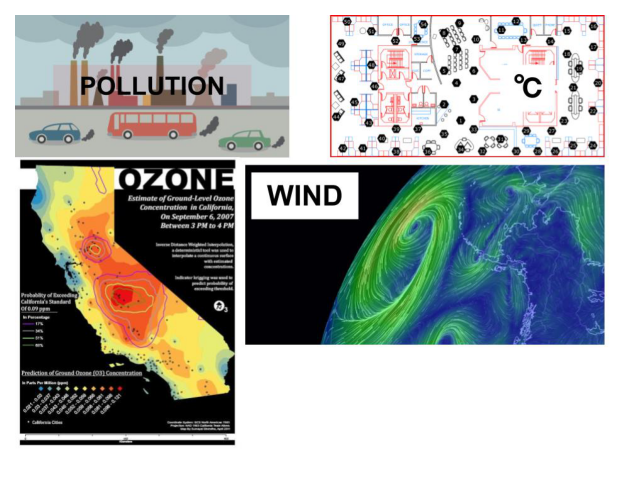

In [3]:
img = plt.imread('figures/Main picture.jpg')
plt.figure(dpi=150)
plt.imshow(img);
plt.axis('off');

### Notation

|Symbol|Identifier | Entity|
| :- | :- | :-: |
| $$A,B,C$$ | upper case (italic) | matrices |
| $$a, b, c$$ | lower case | scalars |
| $$\mathbf{a},\mathbf{b},\mathbf{c}$$ | lower case (bold) | vectors |

### Table of contents

1.  Gaussian processes (GP)
1.  Non-stationary space-time GP
1.  Efficient learning of GP
1.  Experiments
1.  Results

### Gaussian Processes (GP)

### Non-linear regression Problem

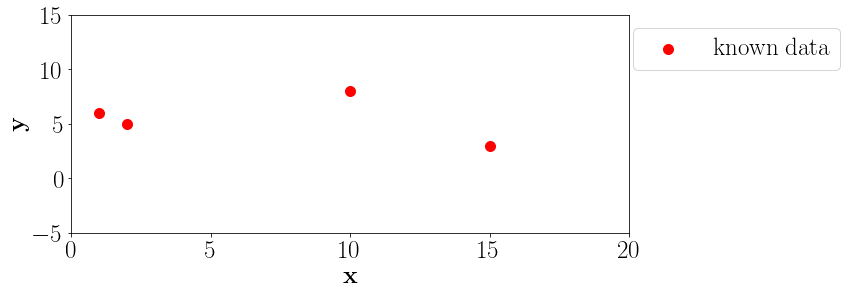

In [4]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
# ax.plot(x_, y_)
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.4,1]);

### Non-linear regression Problem

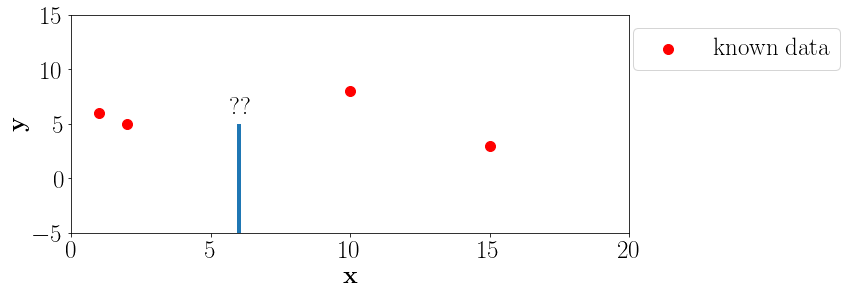

In [5]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
ax.vlines(6,-5,5,linewidth=4);
ax.text(5.7,6,'??')
# ax.plot(x_, y_)
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.4,1]);

### Non-linear regression Problem

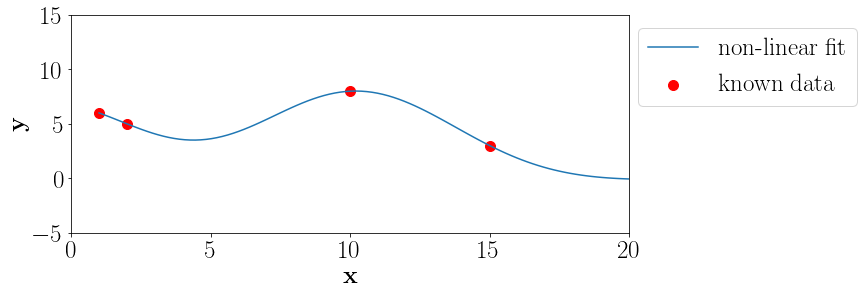

In [6]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
ax.plot(x_, y_,label='non-linear fit')
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.43,1]);

### Non-linear regression Problem

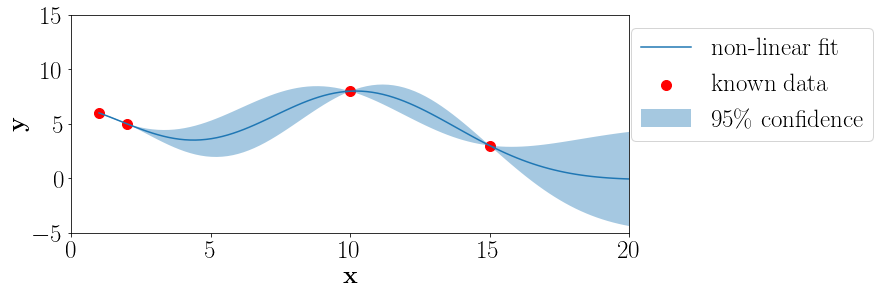

In [7]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
ax.plot(x_, y_,label='non-linear fit')
ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4, label='95\% confidence')
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.46,1]);

### Single observation - 1D Gaussian distribution
\begin{equation}
    y_1 \sim \mathcal{N}(0,\sigma_1^2)
\end{equation}

In [8]:
latexify(10,4)
fig, ax = plt.subplots()
x_d = np.linspace(-6, 6, 400)

def update(x):
    i, var = x
    ax.cla()
    one_dim_normal_data = np.random.normal(0, var, size=1000)
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(one_dim_normal_data[:, None])

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x_d[:, None])
    format_axes(ax)
    ax.fill_between(x_d, np.exp(logprob), alpha=0.4, color='gray')
    ax.scatter(one_dim_normal_data, np.full_like(one_dim_normal_data, -0.01), edgecolors='k',c='w')
    ax.set_title(f"$\sigma_1$ = {var}")
    ax.set_xlabel('$y_1$')
    ax.set_ylim(-0.05,0.5)
    ax.set_xlim(-8,8)
    ax.set_ylabel('$pdf(y_1)$')
    
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=[(i,var) for i, var in enumerate(np.linspace(0.5,2,10).round(2))])
rc('animation', html='jshtml')
anim

### Bi-variate Gaussian distributions

\begin{equation}
\small
    \begin{bmatrix}
    y_1\\y_2
\end{bmatrix}
    \sim \mathcal{N}\left(
    \begin{bmatrix}
    0\\0
\end{bmatrix},
    \begin{bmatrix}
    \sigma_1^2 & \sigma_{12}\\
    \sigma_{21} & \sigma_{2}^2\\ 
\end{bmatrix}
    \right)
\end{equation}

In [9]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def make_pdf_2d_gaussian(mu, sigma, ax):
    ax.cla();ax2.cla()
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)



    # Create a surface plot and projected filled contour plot under it.
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.Greys)
    
    ax.set_xlabel(r"$y_1$")#,labelpad=-20)
    ax.set_ylabel(r"$y_2$")#,labelpad=-18)
    ax.set_zlabel("PDF")
    ax.tick_params(axis='both', which='major', pad=-1)

    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.Greys)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.25)
    ax.set_zticks(np.linspace(0,0.2,2))
    ax.view_init(27, -25)
    ticks = ['$y_1$','$y_2$']
    sns.heatmap(sigma, ax=ax2, cbar=False, annot=True, xticklabels=ticks, yticklabels=ticks)
    ax2.set_title('Covariance matrix')

latexify(10,5)
mu = np.array([0., 0.])
fig = plt.figure()
ax=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2)
# plt.subplots_adjust(wspace=1)
def update(x):
    i, s12 = x
    sigma = np.array([[ 1. , s12], [s12,  1]])
    make_pdf_2d_gaussian(mu, sigma, ax)
    
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=[(i,s12) for i, s12 in enumerate(np.linspace(0.9,-0.9,11).round(2))])
rc('animation', html='jshtml')
anim

In [10]:
latexify(10,5)
fig, ax = plt.subplots(1,2)

def update(corr):
    for axx in ax:
        axx.cla()
    np.random.seed(20)
    mu = np.zeros(2)
    sigma = np.array([[1,corr],[corr, 1]])
    L = np.linalg.cholesky(sigma)
    z = np.random.multivariate_normal(mu, np.eye(2)*0.6, size=10)
    zp = (L@z.T).T

    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 3, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)
    ticks = ['$y_1$','$y_2$']
    sns.heatmap(sigma, ax=ax[0], annot=True, cbar=False, xticklabels=ticks, yticklabels=ticks)
    ax[1].contour(X, Y, Z, cmap=cm.Greys);
    ax[1].scatter(zp[:,0], zp[:,1],c='r',s=40)
    ax[1].set_xlabel('$y_1$');ax[1].set_ylabel('$y_2$');

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=[0.7,0.4,0,0.4,0.7,0.9])
rc('animation', html='jshtml')
anim

### Bi-variate Gaussian distribution (another view-point)

In [11]:
sigma_2 = 0.1 
def plot_2d_contour_pdf_dimensions(random_num):
    sigma = np.array([[1,sigma_2],[sigma_2,1]])
    for axx in ax:
        axx.cla()
    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 3, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)
    random_point = F.rvs(random_state=random_num)
    ticks = ['$y_1$','$y_2$']
    sns.heatmap(sigma, ax=ax[0], annot=True, cbar=False, xticklabels=ticks, yticklabels=ticks)
    ax[1].contour(X, Y, Z, cmap=cm.Greys)
    ax[1].scatter(random_point[0], random_point[1], color='k',s=100)
    ax[1].set_xlabel(r"$y_1$")
    ax[1].set_ylabel(r"$y_2$")
    
    data_array = pd.Series(random_point, index=['$x_1$','$x_2$'])
    data_array.plot(ax=ax[2], kind='line', marker='o',color='k')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[2].set_ylim(-3, 3)
    ax[2].set_ylabel('$\mathbf{y}$')
    
    format_axes(ax[0])
    format_axes(ax[1])
    format_axes(ax[2])
    ax[0].set_title("Covariance Matrix")
    ax[1].set_title("Contour of pdf")
    ax[2].set_title("Visualising the point")
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.close()
#     plt.tight_layout()
#     import os
#     if not os.path.exists("images"):
#         os.makedirs("images")
#     if not os.path.exists(f"images/{sigma[0, 1]}"):
#         os.makedirs(f"images/{sigma[0, 1]}")
#     plt.savefig(f"images/{sigma[0, 1]}/{random_num}.pdf", bbox_inches="tight")
#     plt.close()

In [12]:
latexify(15,5)
fig, ax  = plt.subplots(ncols=3)

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_2d_contour_pdf_dimensions, frames=range(20))
rc('animation', html='jshtml')
anim

In [13]:
latexify(15,5)
fig, ax  = plt.subplots(ncols=3)

sigma_2=0.9
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_2d_contour_pdf_dimensions, frames=range(20))
rc('animation', html='jshtml')
anim

### Adhoc randomness to systematic randomness (Kernels)

* **Inuition**: Covariance between $y_1$ and $y_2$ depends on "how far $x_1$ is from $x_2$".

* A kernel or covariance function can be used to induce this behaviour

\begin{equation}
    Cov(y_1,y_2) = k(\mathbf{x}_1,\mathbf{x}_2) = \sigma_{12}
\end{equation}

### Squared exponential (RBF) kernel

\begin{equation}
    k(x_1,x_2) = e^{-\left(\frac{x_1-x_2}{l^2}\right)^2}
\end{equation}

In [14]:
latexify(10,3)
fig, ax = plt.subplots()
format_axes(ax)

x_1 = np.linspace(-5,5,100)
x_2 = 0

def rbf(l):
    tau = (x_1-x_2)/l
    return np.exp(-tau**2)

def update(l):
    ax.cla()
    ax.set_ylim(-0.1,1.1)
    kk = rbf(l)
    ax.plot(x_1, kk);
    ax.set_title(f'$l={l}$');
    ax.set_xlabel('$x$')
    ax.set_ylabel('$k(0,x)$')

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=range(1,6))
rc('animation', html='jshtml')
anim

### Effect of lengthscale on observations

In [15]:
def RBF(x1,x2,l):
    tau = (x1-x2)/l
    return np.exp(-tau**2)

def plot_vis(l):
    np.random.seed(0)
    for axx in ax:
        axx.cla()
    
    X = np.linspace(-5,5,5).reshape(-1,1).round(2)
    sigma = RBF(X,X.T,l)

    y = np.random.multivariate_normal(np.zeros(X.shape[0]), sigma, size=1)
    ticks = [f'$y_{i}$' for i in range(X.shape[0])]
    sns.heatmap(sigma, ax=ax[0], annot=True, cbar=False, xticklabels=ticks, yticklabels=ticks, fmt='.2f')
    
    for i in range(y.shape[0]):
        data_array = pd.Series(y[i,:], index=[j for j in X.ravel()])
        data_array.plot(ax=ax[1], kind='line', marker='o',color='k')
#     plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[1].set_xlabel('$\mathbf{x}$')
    ax[1].set_ylim(-3.5, 3.5)
    ax[1].set_ylabel('$\mathbf{y}$')
    
    format_axes(ax[0])
    format_axes(ax[1])
    ax[0].set_title(f"Covariance Matrix, $l={l}$, $N={X.shape[0]}$")
    ax[1].set_title("Visualising observations")
    plt.close()

In [16]:
latexify(12,4)
fig, ax = plt.subplots(1,2)

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_vis, frames=np.exp(np.linspace(0,5,15)).round(2))
rc('animation', html='jshtml')
anim

In [17]:
def RBF(x1,x2,l):
    tau = (x1-x2)/l
    return np.exp(-tau**2)

def plot_vis(l):
    np.random.seed(0)
    for axx in ax:
        axx.cla()
    
    X = np.linspace(-5,5,100).reshape(-1,1).round(2)
    sigma = RBF(X,X.T,l)

    y = np.random.multivariate_normal(np.zeros(X.shape[0]), sigma, size=5)
    sns.heatmap(sigma, ax=ax[0], annot=False, cbar=False, fmt='.2f')
    
    for i in range(y.shape[0]):
        data_array = pd.Series(y[i,:], index=[j for j in X.ravel()])
        data_array.plot(ax=ax[1], kind='line', marker='o')
#     plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[1].set_xlabel('$\mathbf{x}$')
    ax[1].set_ylim(-3.5, 3.5)
    ax[1].set_ylabel('$\mathbf{y}$')
    
    format_axes(ax[0])
    format_axes(ax[1])
    ax[0].set_title(f"Covariance Matrix, $l={l}$, $N={X.shape[0]}$")
    ax[1].set_title("Visualising observations")
    plt.close()

In [18]:
latexify(12,4)
fig, ax = plt.subplots(1,2)

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_vis, frames=np.linspace(1,5,10).round(2))
rc('animation', html='jshtml')
anim

### Whole picture

* Observations togather follow a multi-variate distributions in space-time

* We can observe only finite number of them $\mathbf{y}$

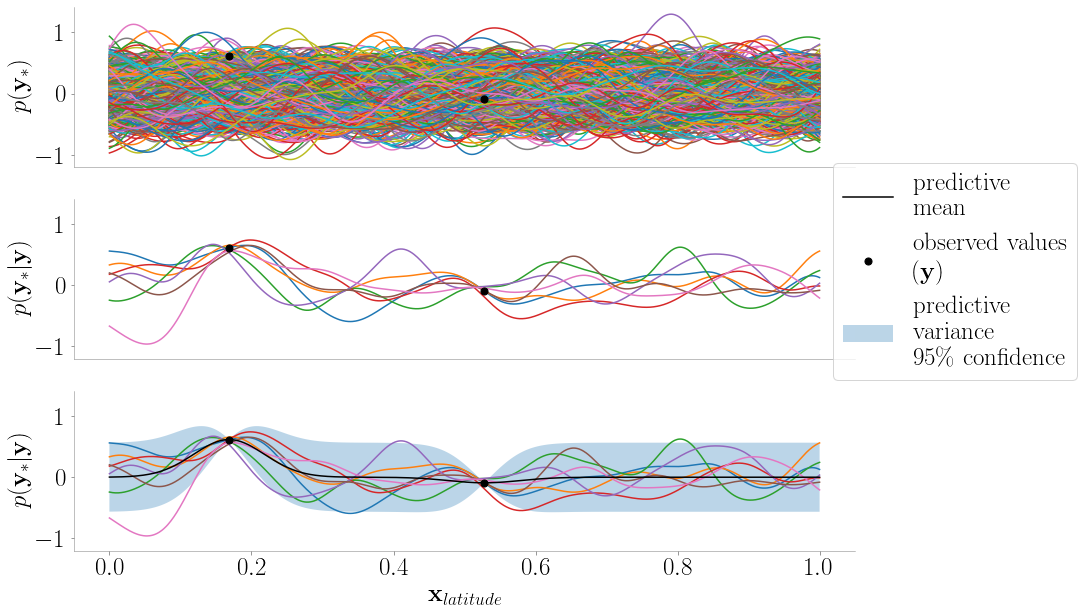

In [19]:
from GPy.kern import RBF
latexify(14,10)
N = 1000
FN = 1000
np.random.seed(2)
x = np.array(sorted(pyDOE2.doe_lhs.lhs(1, N))).reshape(-1,1)
xt_ind = np.random.choice(x.shape[0], 2) # Observed index
k = RBF(1, lengthscale=0.05, variance=0.08)
cov = k.K(x)
y = np.random.multivariate_normal(np.zeros(N), cov, size=FN)

fig, ax = plt.subplots(3,1, sharey=True)
for ind in range(FN):
    ax[0].plot(x, y[ind,:]);
ax[0].scatter(x[xt_ind], y[0,xt_ind],c='k',s=50,zorder=10,label='observed values\n($\mathbf{y}$)')
### Plotting posterior
# filtering functions that passes through observed values
y_ind = np.arange(y.shape[0])[np.all(np.abs(y[0,xt_ind]-y[:,xt_ind])<0.1, axis=1)]
ax[1].scatter(x[xt_ind], y[0,xt_ind],c='k',s=50,zorder=10)
for ind in y_ind:
    ax[1].plot(x, y[ind,:]);
ax[0].set_ylabel('$p(\mathbf{y_*})$');
# ax[1].set_xlabel('$\mathbf{x}_{latitude}$');
ax[1].set_ylabel('$p(\mathbf{y_*|y})$');
# ax[0].legend(bbox_to_anchor=(1,1));

ax2 = ax[2]
ax2.set_ylim(*ax[0].get_ylim())
post_mean = (cov[:,xt_ind]@np.linalg.inv(cov[np.ix_(xt_ind,xt_ind)])@y[0,xt_ind].reshape(-1,1)).squeeze()
post_cov = cov - cov[:,xt_ind]@np.linalg.inv(cov[np.ix_(xt_ind,xt_ind)])@cov[xt_ind,:]
post_std2 = np.sqrt(post_cov.diagonal())*2
for ind in y_ind:
    ax2.plot(x, y[ind,:]);
ax2.scatter(x[xt_ind], y[0,xt_ind],c='k',s=50,zorder=10,label='observed values\n($\mathbf{y}$)')
ax2.plot(x, post_mean,color='k',label='predictive\nmean');
ax2.fill_between(x.squeeze(),post_mean-post_std2, post_mean+post_std2, alpha=0.3, label='predictive\n variance\n 95\% confidence');
ax2.legend(bbox_to_anchor=[1.3,2.5]);
ax2.set_xlabel('$\mathbf{x}_{latitude}$');
ax2.set_ylabel('$p(\mathbf{y_*|y})$');
ax[0].set_xticks([]);ax[1].set_xticks([])

format_axes(ax2)

format_axes(ax[0])
format_axes(ax[1]);
# plt.tight_layout();

### Can we find $p(\mathbf{y_*|y})$ analytically?

\begin{equation}
    p(\mathbf{y}_*|\mathbf{y}) = \mathcal{N}(\boldsymbol{\mu}_*, \Sigma_*)   
\end{equation}

$X,X_*:R^3$, $\;\;\;\;\;$$\mathbf{y,y_*}:R$
    
\begin{align}
    \mathbf{\mu}_* &= K(X_*,X)K^{-1}(X,X)\mathbf{y}\\
     \Sigma_* &= K(X_*,X_*)-K(X_*,X)K(X,X)^{-1}K(X,X_*)
\end{align}

### NOSTILL-GP

### Stationary RBF kernel

\begin{align}
       k_{SE}(x_i,x_j) &= \sigma_f^2\exp\left(-\left(\frac{x_i-x_j}{l}\right)^2\right) \tag{1}\\
       \tau &= \frac{(x_i-x_j)}{l} \\
        k_{SE}(\tau) &= \sigma_f^2\exp(-\tau^2) \tag{1}
\end{align}

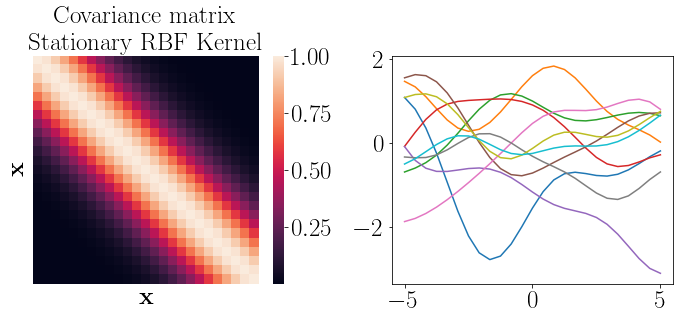

In [20]:
latexify(10,5)
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
kernel = RBF(1, lengthscale=2, variance=1)

fig, ax = plt.subplots(1,2)
sns.heatmap(kernel.K(x,x), xticklabels=[], yticklabels=[], ax=ax[0]);
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Covariance matrix\nStationary RBF Kernel');

y = np.random.multivariate_normal(np.zeros(25), kernel.K(x,x), size=10)
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
plt.tight_layout()

### Non-stationary RBF kernel

\begin{equation}
        l_{ij} = \frac{l_i+l_j}{2}\\
        \tau = \frac{(x_i-x_j)}{l_{ij}}\\
        k_{SE}(\tau) = \sigma_f^2\exp(-\tau^2)
\end{equation}

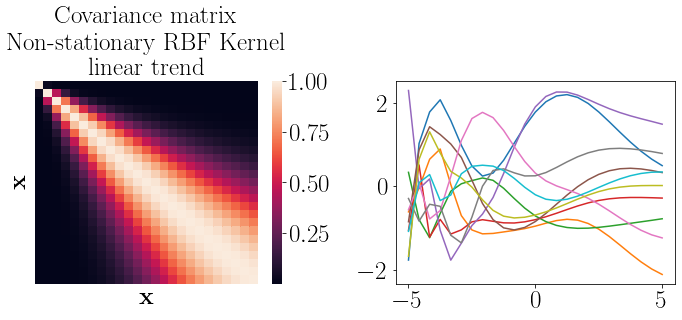

In [21]:
latexify(10,5)
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.linspace(0.1,6,25).reshape(-1,1)

def NSRBF(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    return np.exp(-tau**2)
    
fig, ax = plt.subplots(1,2)
sns.heatmap(NSRBF(x,x,l,l), xticklabels=[], yticklabels=[], ax=ax[0]);
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Covariance matrix\nNon-stationary RBF Kernel\nlinear trend');
plt.tight_layout()

y = np.random.multivariate_normal(np.zeros(25), NSRBF(x,x,l,l), size=10)
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
plt.tight_layout()

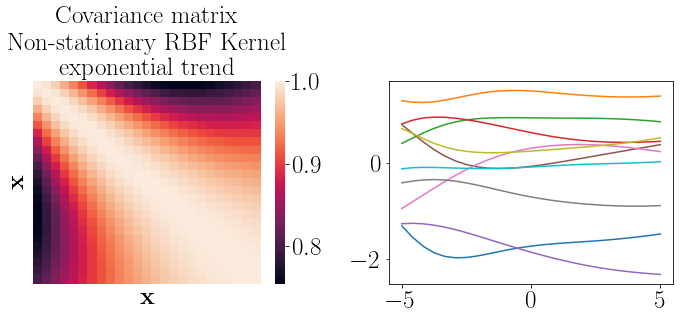

In [22]:
latexify(10,5)
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.exp(np.linspace(0.1,2,25).reshape(-1,1))*5

def NSRBF(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    return np.exp(-tau**2)
    
fig, ax = plt.subplots(1,2)
sns.heatmap(NSRBF(x,x,l,l), xticklabels=[], yticklabels=[], ax=ax[0]);
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Covariance matrix\nNon-stationary RBF Kernel\nexponential trend');
plt.tight_layout()

y = np.random.multivariate_normal(np.zeros(25), NSRBF(x,x,l,l), size=10)
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
plt.tight_layout()

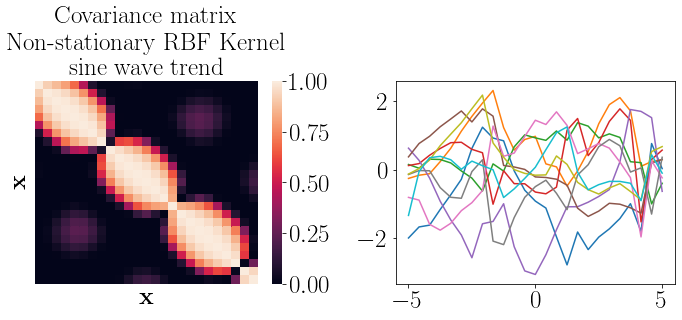

In [23]:
latexify(10,5)
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.sin(np.linspace(0.1,10,25).reshape(-1,1))*5

def NSRBF(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    return np.exp(-tau**2)
    
fig, ax = plt.subplots(1,2)
sns.heatmap(NSRBF(x,x,l,l), xticklabels=[], yticklabels=[], ax=ax[0]);
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Covariance matrix\nNon-stationary RBF Kernel\nsine wave trend');
plt.tight_layout()

y = np.random.multivariate_normal(np.zeros(25), NSRBF(x,x,l,l), size=10)
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
plt.tight_layout()

### Theoram 1 (Seperable kernel By Paciorek et al.)

\begin{align}\label{LLS}
\Sigma_i &= 
    \begin{bmatrix}
    l^{lat}_i & 0 & 0\\
    0 & l^{long}_i & 0\\
    0 & 0 & l^{t}_i
    \end{bmatrix}\\
     \tau &= \sqrt{(\mathbf{x}_i - \mathbf{x}_j)^T\left(\frac{\Sigma_i+\Sigma_j}{2}\right)^{-1}(\mathbf{x}_i - \mathbf{x}_j)}\label{tau}\\
        K^{NS}(\mathbf{x}_i, \mathbf{x}_j) &= \sigma_f^2|\Sigma_i|^{\frac{1}{4}}|\Sigma_j|^{\frac{1}{4}}\left|\frac{\Sigma_i+\Sigma_j}{2}\right|^{-\frac{1}{2}} K^S(\tau)\\
\end{align}

### Theoram 1 (Non-seperable kernel By Authors)

\begin{align}\label{LLS}
     \tau^s &= \sqrt{(\mathbf{x}_i^s - \mathbf{x}_j^s)^T\left(\frac{\Sigma^s_i+\Sigma^s_j}{2}\right)^{-1}(\mathbf{x}_i^s - \mathbf{x}_j^s)}\\
     \tau &= f(\tau^s, \tau^t)\\
        K^{NS}(\mathbf{x}_i, \mathbf{x}_j) &= \sigma_f^2|\Sigma_i|^{\frac{1}{4}}|\Sigma_j|^{\frac{1}{4}}\left|\frac{\Sigma_i+\Sigma_j}{2}\right|^{-\frac{1}{2}} K^S(\tau)\\
\end{align}

### Efficient learning of GPs

##### Efficient learning of GPs
### Time-complexity of NOSTILL-GP

* $n$ observations, $3n$ parameters (lengthscales)
* $n$ number of gradient calculations and updates

##### Efficient learning of GPs
### 4-GP Model (3-local, 1-global)

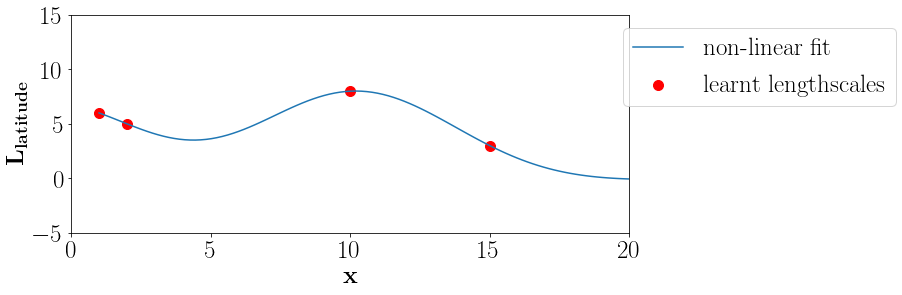

In [24]:
display(Markdown('##### Efficient learning of GPs\n### 4-GP Model (3-local, 1-global)'))
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='learnt lengthscales');
ax.plot(x_, y_,label='non-linear fit')
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{L_{latitude}}$');
ax.legend(bbox_to_anchor=[1.5,1]);

##### Efficient learning of GPs
### 4-GP model time-complexity
* ($n'<<n$) parameters (lengthscales), $n$ observations
* $n'$ number of gradient calculations and updates
* inference over $n$ points in $nn'^2$ time
* Does this work in practise? Time-taken?

##### Efficient learning of GPs - 4-GP model - Choice of latent locations
### Choice of latent locations

* Maximizing Information gain (Krause et al.)
    * Entropy
    * Mutual information

##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Krause algo

We need covariance matrix

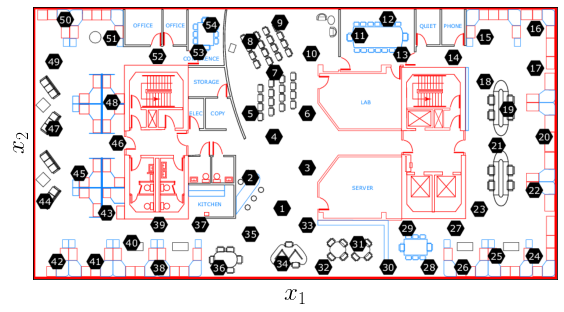

In [25]:
display(Markdown('##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Krause algo'))
img2 = plt.imread('http://db.csail.mit.edu/labdata/lab.png')
plt.figure(figsize=(12,5))
plt.imshow(img2);
plt.xlabel('$x_1$');plt.ylabel('$x_2$');
plt.xticks([]);plt.yticks([]);
display(Markdown('We need covariance matrix'))

##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Krause algo

### How do we get the covariance matrix? - Method 1

1. Using empirical covariance matrix (across space) - Get $X'_s$ by Krause algo.

| time | loc1 | loc2 | loc3|
| --- | --- | --- |---|
| 0 | O1 | O2 | O3|
| 1 | O4 | O5 | O6|
| 2 | O7 | O8 | O9|

##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Krause algo

### How do we get the covariance matrix? - Method 1

1. Using empirical covariance matrix (across time) - Get $\mathbf{x}'_t$ by Krause algo.

| loc | t1 | t2 | t3|
| --- | --- | --- |---|
| loc1 | O1 | O2 | O3|
| loc2 | O4 | O5 | O6|
| loc3 | O7 | O8 | O9|

##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Krause algo

### How do we get the covariance matrix? - Method 1

* Combining $X'_s$ and $x'_t$, we got the latent locations $X'$

##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Krause algo

### How do we get the covariance matrix? - Method 2

* Fit a stationary GP to $X \to \mathbf{y}$. 
* Get covariance matrix by evaluating $K(X,X)$
* Use Krause algo to get $X'$ directly.

##### Efficient learning of GPs - 4-GP model - Choice of latent locations - Pseudo inputs

### Latent locations by pseudo-inputs

* **intuition:** Learning train data from test data
* We want to select $m$ number of locations $\bar{X}$. Posterior $p(y|\bar{y})$ should be maximized
* locations of $\bar{X}$ are learnt using posterior likelihood.

##### Efficient learning of GPs - Sparse GPs

### Sparse GPs

* Melkumyan et al. propose a kernel to sparsify covariance matrix

\begin{align}
        K^{Sparse}(\tau) = \begin{cases} \left[\frac{2+cos(2\pi\tau)}{3}(1-\tau)+\frac{1}{2\pi}sin(2\pi\tau)\right] & \tau<1\\
        0 & \tau \ge 1
        \end{cases}
\end{align}

##### Efficient learning of GPs - Sparse GPs

### Sparse GPs

* Authors simply multiply their kernel with sparse kernel to induce sparsity in cov matrix

\begin{align}
        K^{NS}(\tau) = K^{NOSTILL}(\tau) \times K^{Sparse}(\tau) 
\end{align}

##### Efficient learning of GPs - Sparse GPs

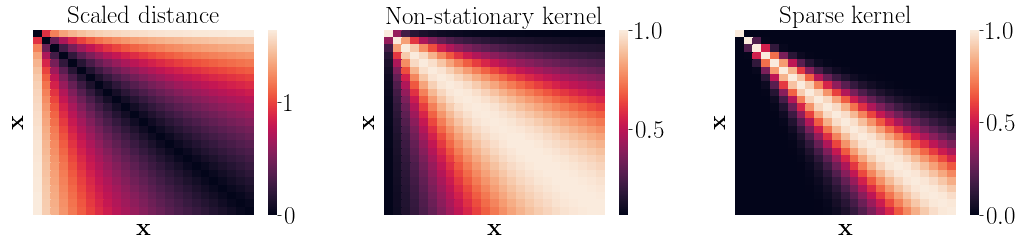

In [28]:
display(Markdown('##### Efficient learning of GPs - Sparse GPs'))
latexify(15,4)

def sparse(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    tau_bool = tau < 1
    kernel = (2+np.cos(2*np.pi*tau))*(1/3)*(1-tau) + (1/2/np.pi)*np.sin(2*np.pi*tau)
    return kernel * tau_bool

fig, ax = plt.subplots(1,3)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.linspace(0.1,6,25).reshape(-1,1)*2
l_ij = (l + l.T)/2
x_ij = np.abs(x - x.T)
tau = x_ij/l_ij
kernel = NSRBF(x,x,l,l)
Skernel = sparse(x,x,l,l)
sns.heatmap(tau, ax=ax[0],xticklabels=[], yticklabels=[]);ax[0].set_title('Scaled distance')
sns.heatmap(kernel, ax=ax[1],xticklabels=[], yticklabels=[]);ax[1].set_title('Non-stationary kernel')
sns.heatmap(Skernel*kernel, ax=ax[2],xticklabels=[], yticklabels=[]);ax[2].set_title('Sparse kernel')
for axx in ax:
    axx.set_xlabel('$\mathbf{x}$')
    axx.set_ylabel('$\mathbf{x}$')
ax[0].set_xlabel('$\mathbf{x}$')
ax[0].set_ylabel('$\mathbf{x}$')
plt.tight_layout()

### Model selection
* Non-seperable structures by Cressie et al. for $\tau=f(\tau_s, \tau_t)$. Used with sparsity.
\begin{align}
        K^S(\tau_s, \tau_t) &=\frac{1}{(\tau_t^2+1)^{\frac{p-1}{2}}}\exp(-\frac{\tau_s^2}{\tau_t^2+1})\\
        K^S(\tau_s, \tau_t) &= \frac{\tau_t^2+1}{[(\tau_t^2+1)^2+\tau_s^2]^{\frac{p}{2}}}
    \end{align}

### Experiments

| Data           | Stations | Train stations | Timeline   | Granularity |
|----------------|----------|----------------|------------|-------------|
| USA Ozone      | 60       | 30             | 1995-2011  | 1 year      |
| Ireland Wind   | 12       | 12             | 1961-1978  | 1 day       |
| Berkeley Temp. | 46       | 23             | March-2004 | 22 min      |

### Results

In the paper